**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Model3_FineTuning - InceptionResNetV2

In [ ]:
model3_FT = keras.models.load_model('/content/drive/MyDrive/Models/01_InceptionResNetV2_TransferLearning_Best_Model.h5')

In [ ]:
model3_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_203 (Conv2D)         (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_203 (B  (None, None, None, 32)       96        ['conv2d_203[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_203 (Activation  (None, None, None, 32)       0         ['batch_normalization_203[

In [ ]:
print(len(model3_FT.layers))

783


In [ ]:
#Setting the trainable and non-trainable layers
for layer in model3_FT.layers:
  layer.trainable=True

In [ ]:
model3_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model3_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
26/26 [==============================] - 127s 1s/step - loss: 0.0594 - accuracy: 0.9831 - val_loss: 61.0698 - val_accuracy: 0.4565
Epoch 2/10
26/26 [==============================] - 15s 586ms/step - loss: 0.0201 - accuracy: 0.9927 - val_loss: 1.1854 - val_accuracy: 0.9130
Epoch 3/10
26/26 [==============================] - 15s 583ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2535 - val_accuracy: 0.9783
Epoch 4/10
26/26 [==============================] - 14s 543ms/step - loss: 0.0427 - accuracy: 0.9952 - val_loss: 1.2280 - val_accuracy: 0.9130
Epoch 5/10
26/26 [==============================] - 14s 553ms/step - loss: 0.0273 - accuracy: 0.9927 - val_loss: 1.9654 - val_accuracy: 0.7609
Epoch 6/10
26/26 [==============================] - 14s 551ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 3.2325 - val_accuracy: 0.7174
Epoch 7/10
26/26 [==============================] - 15s 561ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 19.2375 - val_accuracy: 0.4565

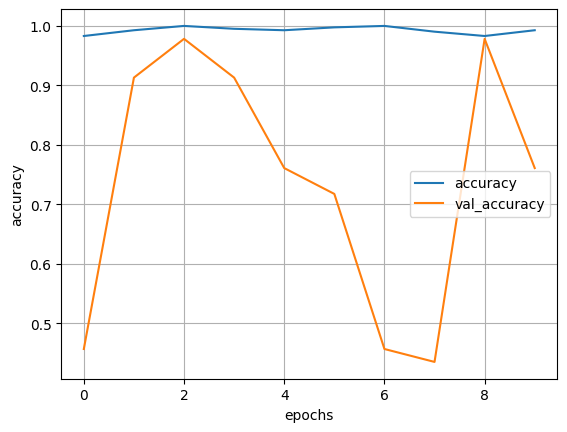

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 12s 1s/step - loss: 1.7015 - accuracy: 0.8312
Test-loss: 1.701464, Test-accuracy: 0.831169


In [ ]:
model3_FT.load_weights("bestFT.h5")
testLoss_FineTune, testAccuracy_FineTune = model3_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 2s 292ms/step - loss: 0.0100 - accuracy: 0.9935
Test-loss: 0.010049, Test-accuracy: 0.993506


In [ ]:
y_proba = model3_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 4s 297ms/step
[2 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 2 0 1 1 1 1 1 0 2 2 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 0 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[68,  1,  0],
       [ 0, 69,  0],
       [ 0,  0, 16]])

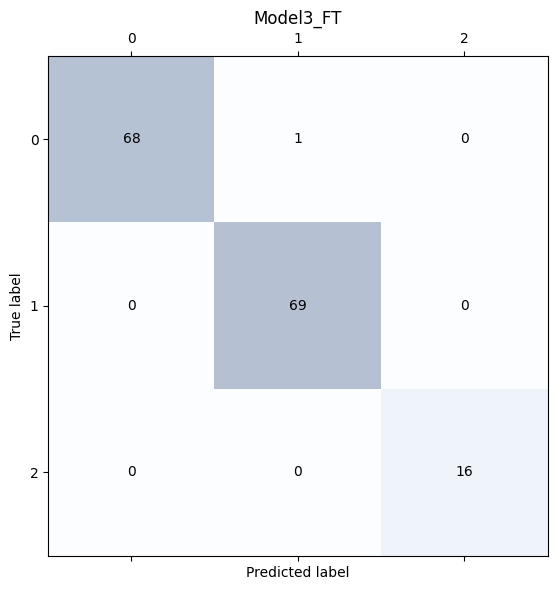

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model3_FT')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model3_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

##Precision, Recall and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9935992578849723
Recall:  0.9935064935064936
F1-score:  0.9935061525147122






In [ ]:
# Saving the best model obtained
model3_FT.save('/content/drive/MyDrive/Models/02_InceptionResNetV2_Finetuned_Best_Model.h5')
print("Model saved as '02_InceptionResNetV2_Finetuned_Best_Model.h5'")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as '02_InceptionResNetV2_Finetuned_Best_Model.h5'
